# Overview

This week we are going to learn a bit about __Data Visualization__, which is an important aspect in Computational Social Science. Why is it so important to make nice plots if we can use stats and modelling? I hope I will convince that it is _very_ important to make meaningful visualizations. In the second part of the class, we will learn how to produce some beautiful figures using the data you downloaded last week. 

Here is the plan:

* __Part 1__: Some talking from me on __why do we even care about visualizing data__. 
* __Part 2__: Here is where you convince yourself that data visualization is useful by doing a __little visualization exercise__.
* __Part 3__: We will look at the relation between the attention to GME on Reddit and the evolution of the GME market indicators.
* __Part 4__: We will visualize the activity of Redditors posting about GME.


## Part 1: Intro to visualization

Start by watching this short introduction video to Data Visualization.
    

> * _Video Lecture_: [Intro to Data Visualization](https://www.youtube.com/watch?v=oLSdlg3PUO0)

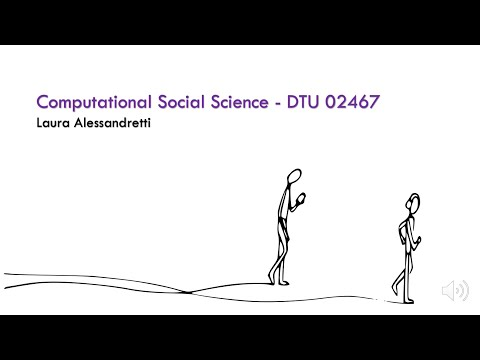

In [230]:
from IPython.display import YouTubeVideo
YouTubeVideo("oLSdlg3PUO0",width=800, height=450)


## Part 2: A little visualization exercise

Ok, but is data visualization really so necessary? Let's see if I can convince you of that with this little visualization exercise.


> *Exercise 1: Visualization vs stats*
> 
> Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
> Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
> * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values (to three decimal places).
> * Use [`scipy.stats.pearsonr`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html) to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdataanalysis2017/master/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is.


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

And the [video below](https://www.youtube.com/watch?v=DbJyPELmhJc) generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises.


In [231]:
# exercise 1
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# specify url for retrieval of data
data = ['data1', 'data2', 'data3', 'data4']
url_path = 'https://raw.githubusercontent.com/suneman/socialdataanalysis2020/master/files/'

# retrieved data using pandas + url
df = pd.DataFrame()
for i, data_name in enumerate(data):
    data_i = pd.read_csv(url_path+data_name+'.tsv', sep='\t', header=None, names=[f'x{i+1}', f'y{i+1}'])
    df[[f'x{i+1}',f'y{i+1}']] = data_i

# show dataframe
df

x1     y1  x2    y2  x3     y3  x4     y4
0   10   8.04  10  9.14  10   7.46   8   6.58
1    8   6.95   8  8.14   8   6.77   8   5.76
2   13   7.58  13  8.74  13  12.74   8   7.71
3    9   8.81   9  8.77   9   7.11   8   8.84
4   11   8.33  11  9.26  11   7.81   8   8.47
5   14   9.96  14  8.10  14   8.84   8   7.04
6    6   7.24   6  6.13   6   6.08   8   5.25
7    4   4.26   4  3.10   4   5.39  19  12.50
8   12  10.84  12  9.13  12   8.15   8   5.56
9    7   4.82   7  7.26   7   6.42   8   7.91
10   5   5.68   5  4.74   5   5.73   8   6.89

In [232]:
# describing the dataframe with 3 digits
np.round(df.describe(), 3)

x1      y1      x2      y2      x3     y3      x4      y4
count  11.000  11.000  11.000  11.000  11.000  11.00  11.000  11.000
mean    9.000   7.501   9.000   7.501   9.000   7.50   9.000   7.501
std     3.317   2.032   3.317   2.032   3.317   2.03   3.317   2.031
min     4.000   4.260   4.000   3.100   4.000   5.39   8.000   5.250
25%     6.500   6.315   6.500   6.695   6.500   6.25   8.000   6.170
50%     9.000   7.580   9.000   8.140   9.000   7.11   8.000   7.040
75%    11.500   8.570  11.500   8.950  11.500   7.98   8.000   8.190
max    14.000  10.840  14.000   9.260  14.000  12.74  19.000  12.500

In [233]:
# loop through columns in dataframe
for i, column in enumerate(df):
    if np.logical_and(i > 0, i % 2 == 0):     # simply for better overview
        print("")
        
    # compute and print mean value with 2 decimal places 
    print('Mean value of {:s} = {:.2f}'.format(column, df[column].mean()))    

Mean value of x1 = 9.00
Mean value of y1 = 7.50

Mean value of x2 = 9.00
Mean value of y2 = 7.50

Mean value of x3 = 9.00
Mean value of y3 = 7.50

Mean value of x4 = 9.00
Mean value of y4 = 7.50


In [234]:
# loop through columns in dataframe
for i, column in enumerate(df):
    if np.logical_and(i > 0, i % 2 == 0):     # simply for better overview
        print("")
        
    # compute and print variance value with 3 decimal places 
    print('Mean value of {:s} = {:.3f}'.format(column, df[column].var()))    

Mean value of x1 = 11.000
Mean value of y1 = 4.127

Mean value of x2 = 11.000
Mean value of y2 = 4.128

Mean value of x3 = 11.000
Mean value of y3 = 4.123

Mean value of x4 = 11.000
Mean value of y4 = 4.123


In [235]:
from scipy.stats import pearsonr
from scipy import stats

Correlation between x0 and y0 = 0.816 (p-value = 0.002)
Characteristics from linear regression: a = 0.500, b= 3.000

Correlation between x1 and y1 = 0.816 (p-value = 0.002)
Characteristics from linear regression: a = 0.500, b= 3.001

Correlation between x2 and y2 = 0.816 (p-value = 0.002)
Characteristics from linear regression: a = 0.500, b= 3.002

Correlation between x3 and y3 = 0.817 (p-value = 0.002)
Characteristics from linear regression: a = 0.500, b= 3.002



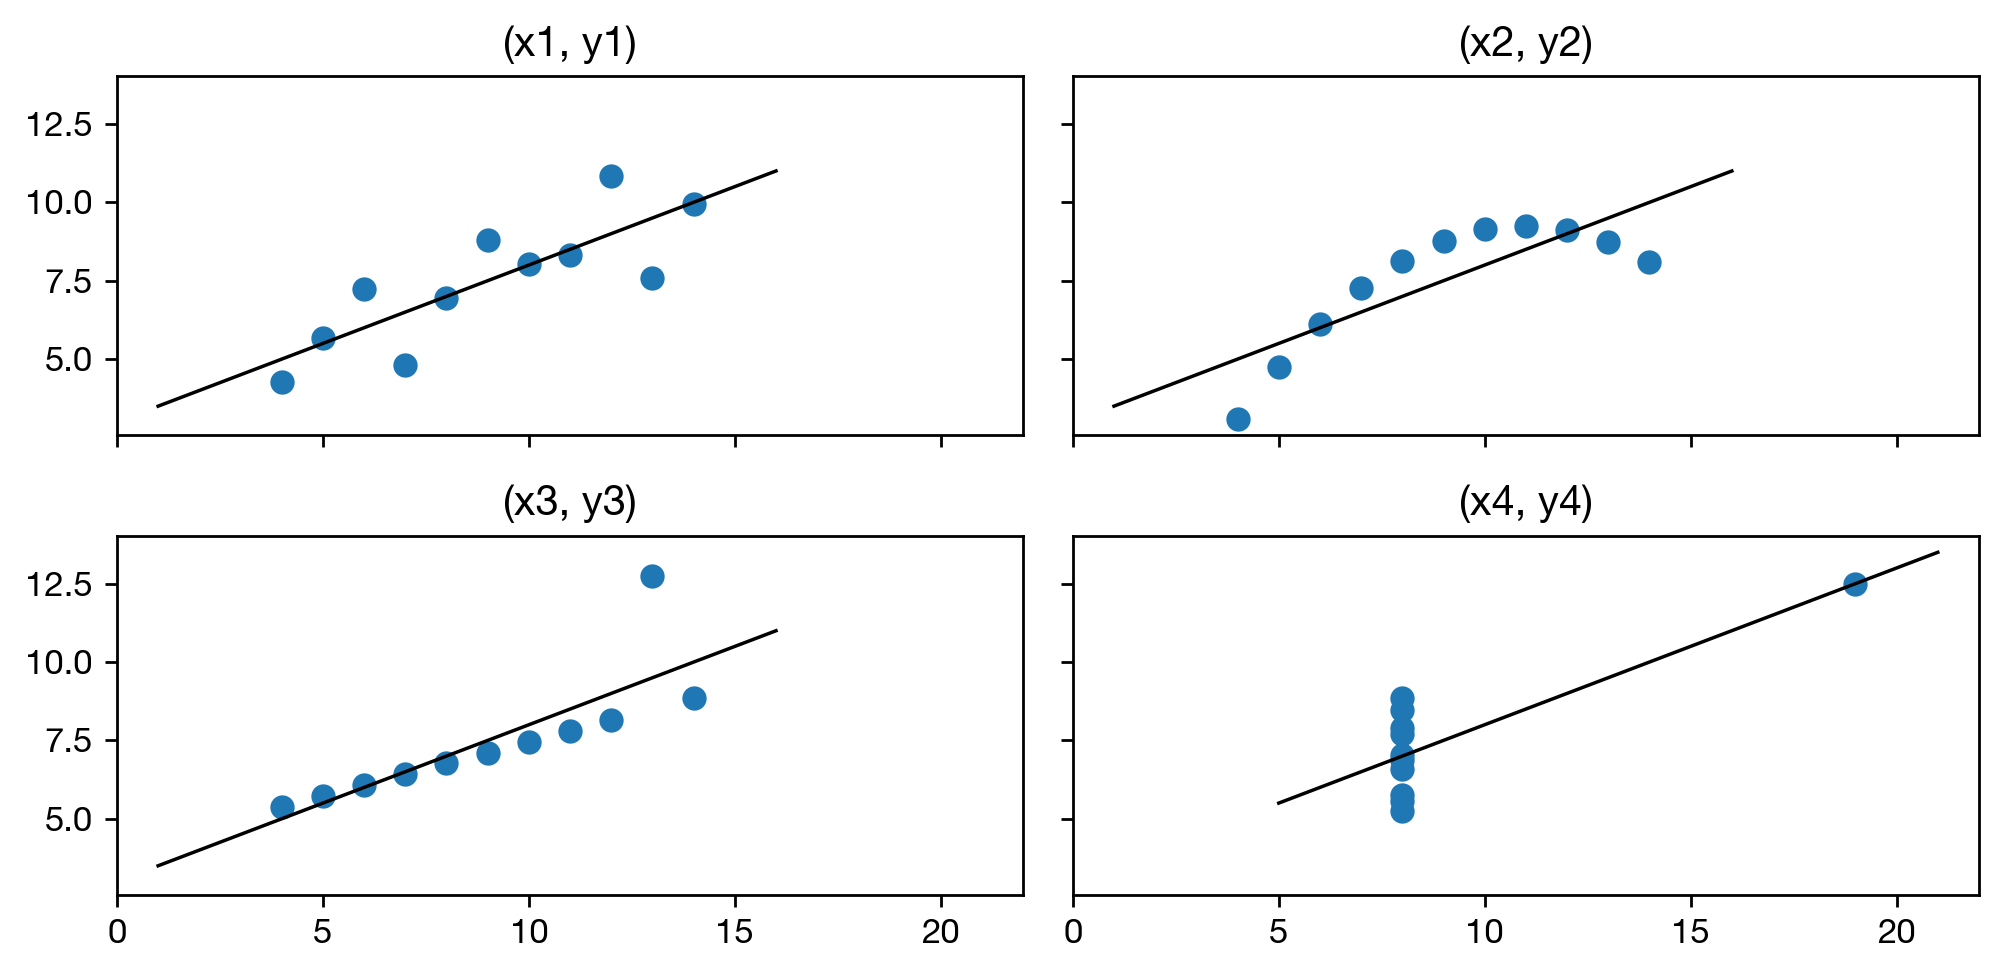

In [236]:
# setup figure
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=((8,4)), dpi=250)

# loop through x/y-pairs
for i in range(4):
    # compute correlation coef.
    x, y = df.iloc[:, 2*i], df.iloc[:, 2*i+1]
    corr, p = pearsonr(x, y)
    print('Correlation between x{:d} and y{:d} = {:.3f} (p-value = {:.3f})'.format(i, i, corr, p))  
    
    # fit linear regression
    res = stats.linregress(x,y)
    slope, intercept, r_value, p_value, std_err = res
    
    print('Characteristics from linear regression: a = {:.3f}, b= {:.3f}\n'.format(slope, intercept))  

    
    # add subplot to figure
    plot_x = np.linspace(x.min()-3, x.max()+2, x.__len__()) # for a longer regression line
    axs[i//2, i%2].scatter(x,y)
    axs[i//2, i%2].plot(plot_x, intercept + slope*plot_x, 'k', label='fitted line')
    axs[i//2, i%2].set_title(f'(x{i+1}, y{i+1})')

plt.tight_layout()
plt.show()

**Comment:**

The idea of the exercise is to show that visualizations *do* in fact have the ability to tell a different story about the data than statistics. This is because all four data sets have identical statistical properties (like mean, variance and correlation) yet look completely different when visualizing the data. This is known as Anscombe's Quartet.

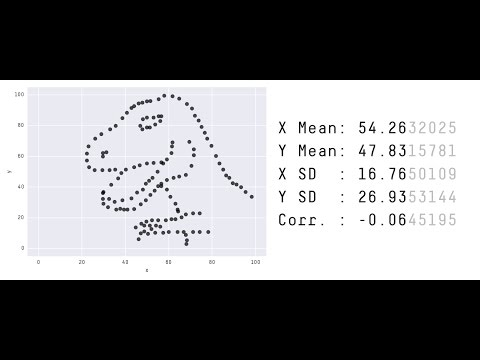

In [237]:
from IPython.display import YouTubeVideo
YouTubeVideo("DbJyPELmhJc",width=800, height=450)



## Prelude to Part 3: Some tips to make nicer figures.

Before even starting visualizing some cool data, I just want to give a few tips for making nice plots in matplotlib. Unless you are already a pro-visualizer, those should be pretty useful to make your plots look much nicer. 
Paying attention to details can make an incredible difference when we present our work to others.

> *Video Lecture*: [How to improve your plots](https://www.youtube.com/watch?v=sdszHGaP_ag)

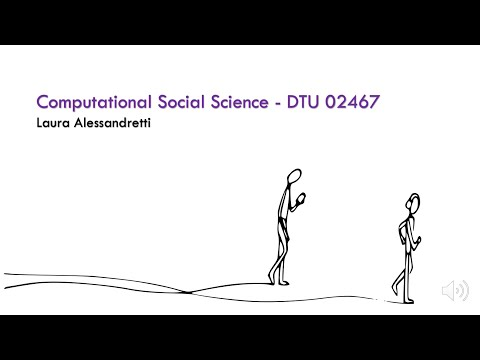

In [238]:
from IPython.display import YouTubeVideo
YouTubeVideo("sdszHGaP_ag",width=800, height=450)


## Part 3:  Visualizing trends:  activity on Reddit and GME prices.

It's really time to put into practice what we learnt by plotting some data! We will start by looking at the time series describing the number of comments about GME in wallstreetbets over time. Using exploratory data visualization, we will try to answer the folling research question:

*Is the activity on wallstreetbet related to the price of the GME stock?*

 We will use two datasets today: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). Make sure to select the same time period as the reddit data you downloaded in Week1.
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> *Reading*: [Section 14.1 of the Data Visualization book](https://clauswilke.com/dataviz/visualizing-trends.html). Start by reading about "visualizing trends" in the Data Visualization Book. We will use moving averages, so you can skip the part on LOESS. 
>
> *Reading*: [Sections 3.1 and 3.2 of the Data Visualization book](https://clauswilke.com/dataviz/coordinate-systems-axes.html#cartesian-coordinates). Learn about non-linear axes to better visualize hetereogeneous data.

> _Exercise 2 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).
> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.
> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?
> 3. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

In [239]:
import matplotlib as mpl
import datetime

In [240]:
# determine data folder path
DATA_DIR = (os.sep).join(os.path.dirname(os.getcwd()).split(os.sep)[:-1]+['data'])

# load file
filename = 'GME.csv'
GME = pd.read_csv(f'{DATA_DIR}{os.sep}{filename}', parse_dates=['Date']).set_index('Date')

# show dataframe
GME.head()

Open  High   Low  Close  Adj Close   Volume
Date                                                   
2020-01-02  6.14  6.47  6.07   6.31       6.31  4453600
2020-01-03  6.21  6.25  5.84   5.88       5.88  3543900
2020-01-06  5.80  5.91  5.60   5.85       5.85  3394800
2020-01-07  5.77  5.83  5.44   5.52       5.52  5228000
2020-01-08  5.49  5.85  5.41   5.72       5.72  5629400

In [241]:
def setup_plt():
    mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['lines.linewidth'] = 1
    
setup_plt()

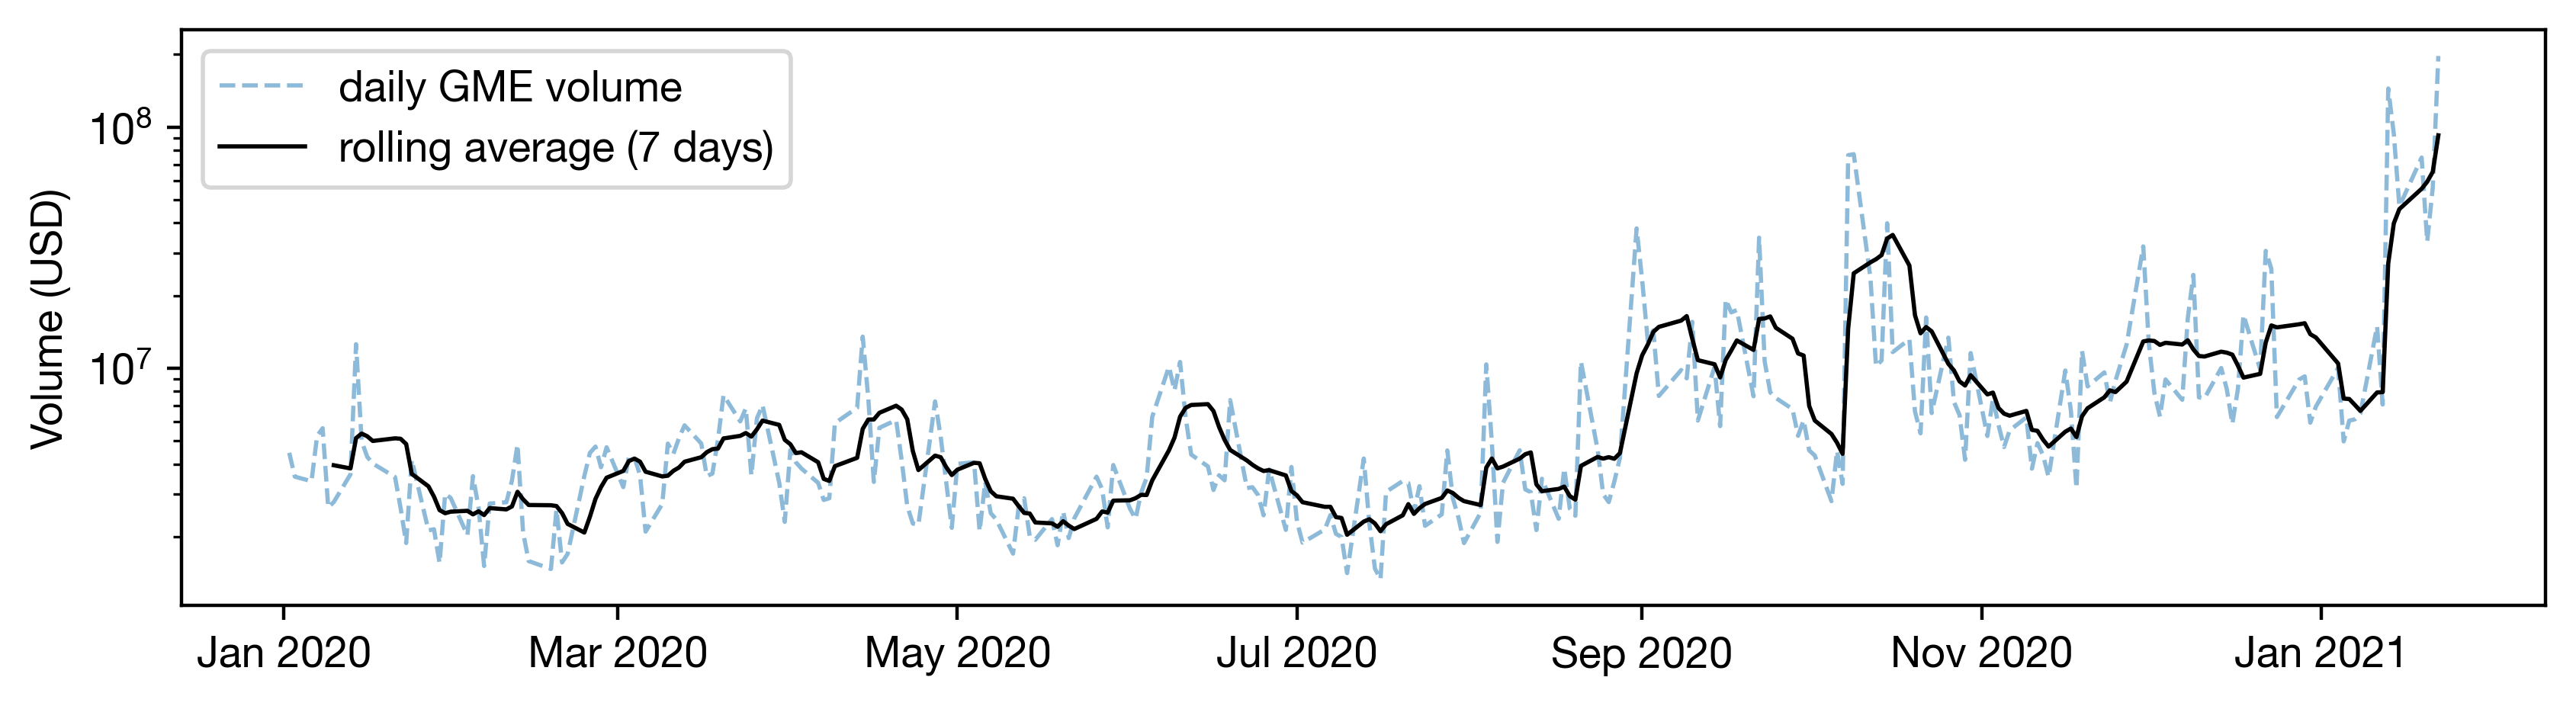

In [242]:
# compute weekly window
rolling_weekly_GME = GME.Volume.rolling(7).mean()

# setup figure
fig, ax = plt.subplots(figsize=((10,2.5)), dpi=400)
date_format = mpl.dates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_ylabel('Volume (USD)')
ax.set_yscale('log')

# plot time series
ax.plot(GME.index, GME.Volume, '--', alpha=0.5, label='daily GME volume')
ax.plot(rolling_weekly_GME.index, rolling_weekly_GME, 'k', label='rolling average (7 days)')
ax.legend()

plt.show()

In [243]:
# load file
filename = f'reddit{os.sep}reddit_comments'
comments = pd.read_pickle(f'{DATA_DIR}{os.sep}{filename}').set_index('date')

# show dataframe
comments.head()

id submission_id  score               author   parent_id  \
date                                                                        
2020-03-18  fkt28v7     t3_fkjaks      1      thisisclassicus   t3_fkjaks   
2020-03-18  fktlmfy     t3_fk0hgq      1  RUatrollorRUserious  t1_fktgtsx   
2020-03-18  fktgtsx     t3_fk0hgq      1         andylikesdub  t1_fkq3ftz   
2020-03-18  fktbqar     t3_fk0hgq      1  RUatrollorRUserious  t1_fktat6o   
2020-03-18  fktat6o     t3_fk0hgq      1               8w80o6  t1_fkq5w2f   

                                                      comment  \
date                                                            
2020-03-18  Fuck these guys - let’s do our magic 4/17 supe...   
2020-03-18  Well, yesterday I fucked up.  I woke up late, ...   
2020-03-18            What’re you holding going into tomorrow   
2020-03-18  Yeah, didn’t word that well or think of the ot...   
2020-03-18  &gt;In order to be assigned, the price would h...   

                  created_time  
date                            
2020-03-18 2020-03-18 04:03:48  
2020-03-18 2020-03-18 09:57:39  
2020-03-18 2020-03-18 08:12:53  
2020-03-18 2020-03-18 06:30:09  
2020-03-18 2020-03-18 06:13:07

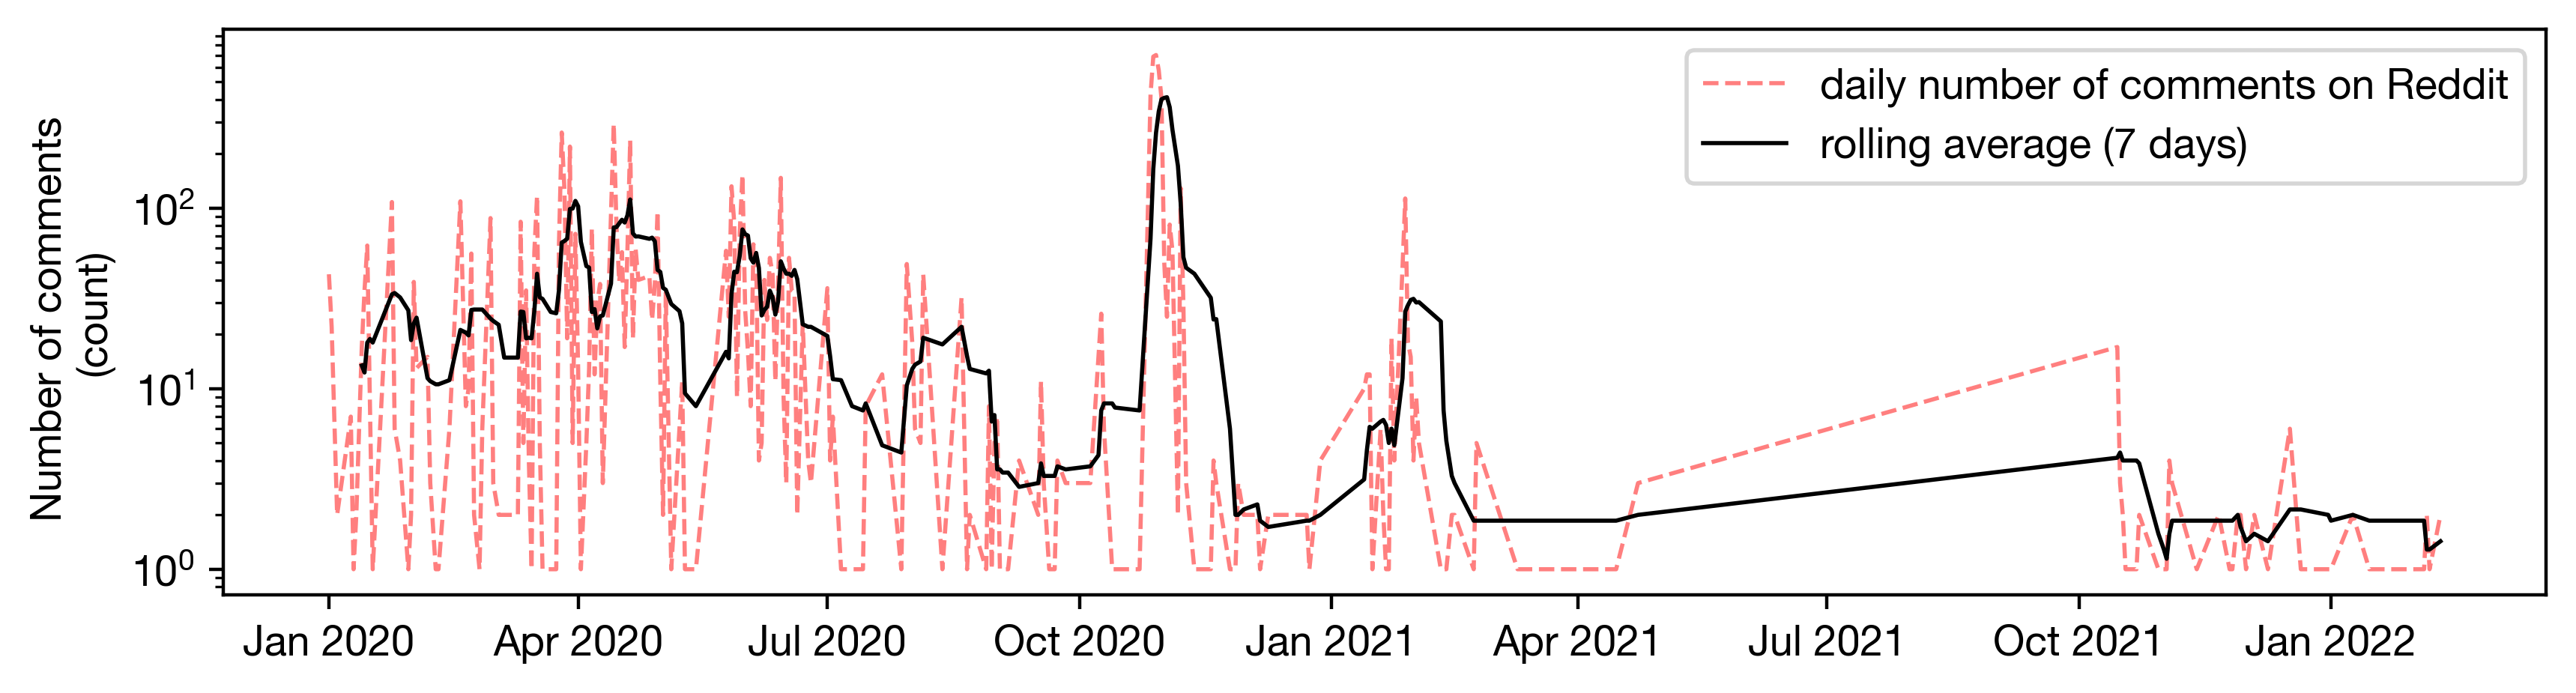

In [244]:
# compute daily + weekly number of comments
daily_comments = pd.DataFrame(comments.groupby(by='date').size(), columns=['num_comments'])
rolling_weekly_comments = daily_comments.rolling(7).mean()

# setup figure
fig, ax = plt.subplots(figsize=((10,2.5)), dpi=400)
date_format = mpl.dates.DateFormatter('%b %Y')
ax.xaxis.set_major_formatter(date_format)
ax.set_ylabel('Number of comments \n(count)')
ax.set_yscale('log')

# plot time series
ax.plot(daily_comments.index, daily_comments.num_comments, 'r--', alpha=0.5, label='daily number of comments on Reddit')
ax.plot(rolling_weekly_comments.index, rolling_weekly_comments, 'k', label='rolling average (7 days)')
ax.legend()

plt.show()

**Comment:**

3. The advantage of using the log-scale on the y-axis is that the smaller values are easier visible than on a linear scale. The rolling window helps visualize the trend of the data and is a generalization of the trend.

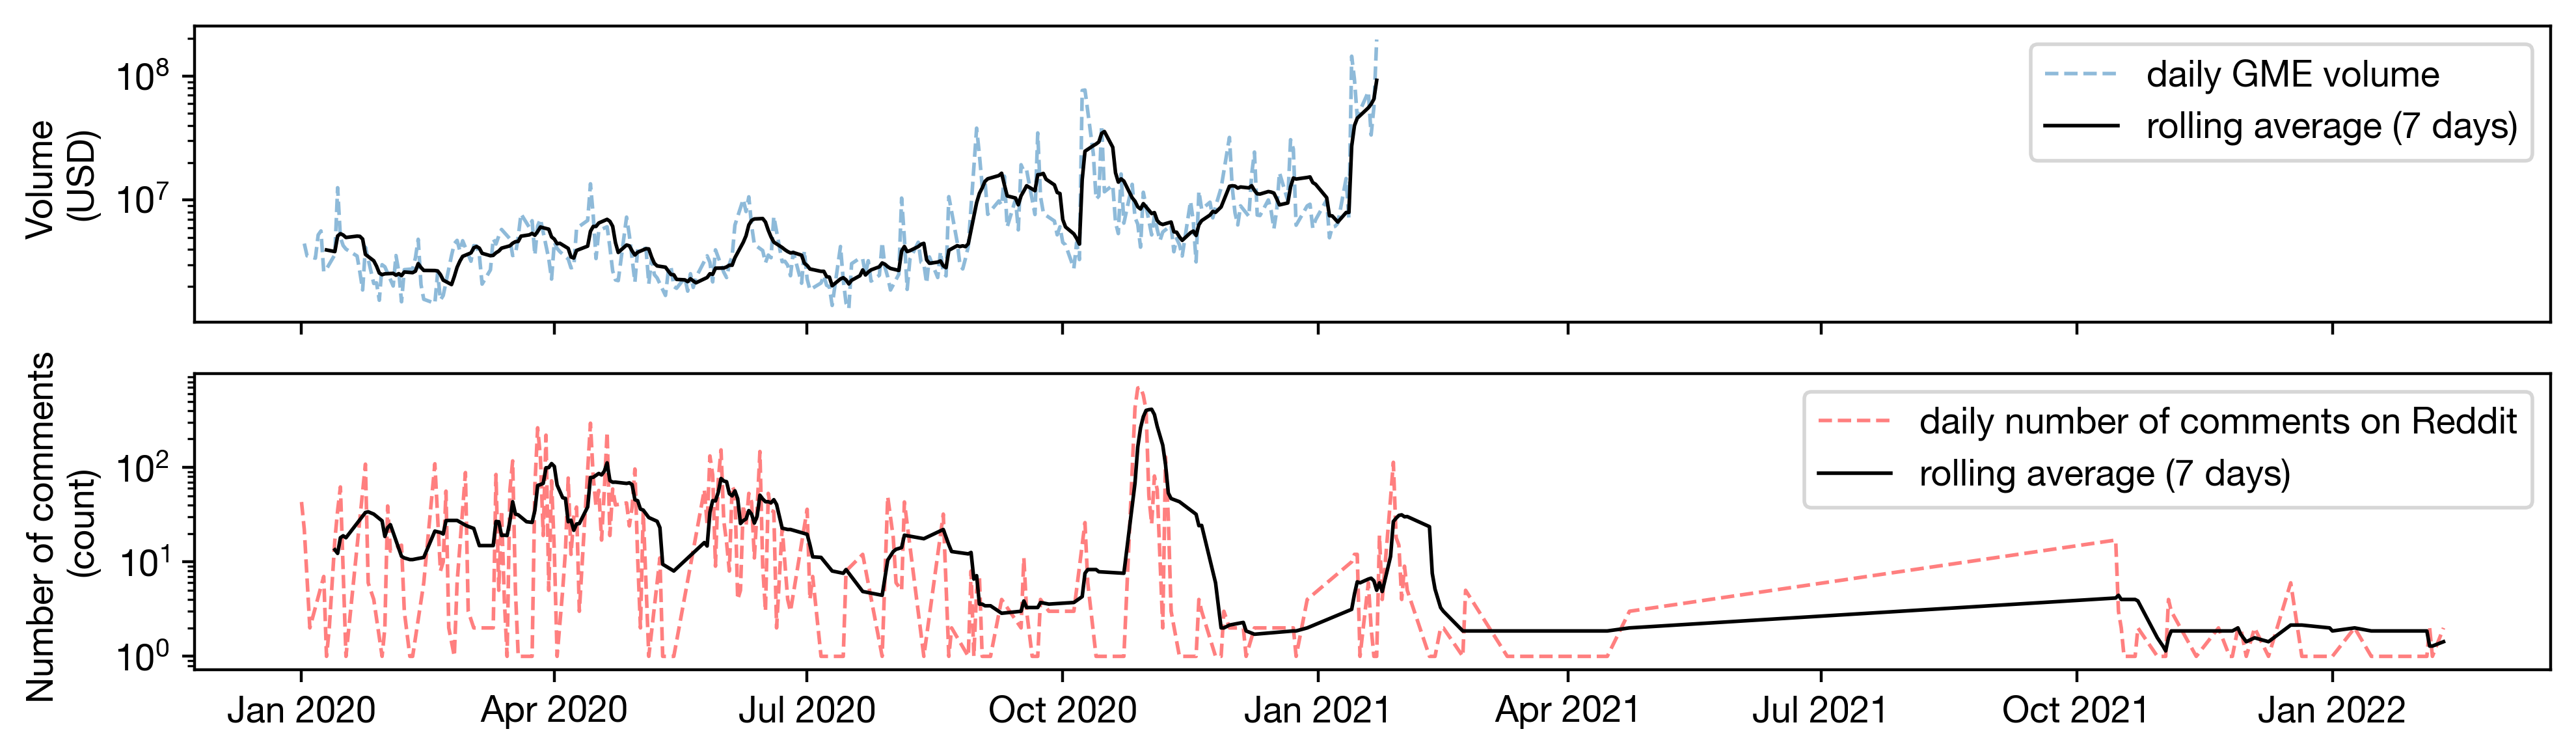

In [245]:
# setup figure
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=((10,3)), dpi=400)
date_format = mpl.dates.DateFormatter('%b %Y')

# plot GME time series
ax[0].plot(GME.index, GME.Volume, '--', alpha=0.5, label='daily GME volume')
ax[0].plot(rolling_weekly_GME.index, rolling_weekly_GME, 'k', label='rolling average (7 days)')
ax[0].xaxis.set_major_formatter(date_format)
ax[0].set_ylabel('Volume \n(USD)')
ax[0].set_yscale('log')
ax[0].legend()

# plot reddit comments time series
ax[1].xaxis.set_major_formatter(date_format)
ax[1].plot(daily_comments.index, daily_comments, 'r--', alpha=0.5, label='daily number of comments on Reddit')
ax[1].plot(rolling_weekly_comments.index, rolling_weekly_comments, 'k', label='rolling average (7 days)')
ax[1].set_ylabel('Number of comments \n(count)')
ax[1].set_yscale('log')
ax[1].legend()

plt.tight_layout()
plt.show()

**Comments:**

4. We see that the comments on reddit related to GME are mainly occurring within the specified time window of submission that we considered in week 1. Also, #TODO: 

## Part 4:  Visualizing associations: GME returns vs volume of comments

We will continue by studying more in detail the association between GME market indicators and the attention to the topic on Reddit. 
First, we will create the time-series of daily [returns](https://en.wikipedia.org/wiki/Price_return). Returns measure the  change in price given two given points in time (in our case we will focus on consecutive days). They constitute a quantity of interest when it comes to stock time-series, because they tell us how much _profit_ one would make if he/she bought the stock on a given day and sold it at a later time. For consistency, we will also compute returns (corresponding to daily changes) for the number of Reddit comments over time.


> *Reading*: [Sections 12.1 and 12.2 of the Data Visualization book](https://clauswilke.com/dataviz/visualizing-associations.html). Learn about visualizing and measuring associations.

> _Exercise 3 : Returns vs number of comments using scatter-plots_.
> In this exercise, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).
> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 
> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? **Hint:** check the [Wikipedia page](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) of the Pearson correlation and its [scipy implementation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html).
> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 
> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 
> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*

In [246]:
# daily log-return of GME
GME['log_return'] = np.log(GME.Close / GME.Close.shift(periods=1, fill_value=0))
GME.reset_index(inplace=True)

# daily log-change in comments
# note: workaround of removing days without comments by merging dataframes as daily_comments only contain days
#       where comments appear
log_change = np.log(daily_comments / daily_comments.shift(periods=1, fill_value=0)).reset_index()
log_change['date'] = log_change.date.astype('datetime64[ns]')
log_change.rename(columns={'date':'Date'}, inplace=True)

# shared representation
df = GME[['Date','log_return', 'Close']].merge(log_change).rename(columns={'Date':'date', 'num_comments':'log_change'})
df.replace(np.inf, 0, inplace=True)
print(f"Shape of shared dataframe: {df.shape}")
df.head()

Shape of shared dataframe: (140, 4)


date  log_return  Close  log_change
0 2020-01-02    0.000000   6.31   -0.670158
1 2020-01-09   -0.030171   5.55    1.252763
2 2020-01-10   -0.021859   5.43   -1.945910
3 2020-01-13    0.000000   5.43    2.140066
4 2020-01-14   -0.142251   4.71    0.722135

In [247]:
# correlation formula correspond to pearson correlation. Calculate significance (p-value) and corr. with scipy
corr_coef, p = pearsonr(df.log_return, df.log_change)
print(f"Correlation coefficient = {corr_coef :.2f} \np-value \t\t= {p:.4f}")

Correlation coefficient = 0.17 
p-value 		= 0.0437


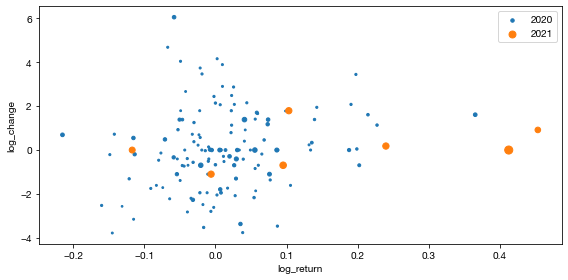

In [248]:
cmap = {2020: 'C0', 2021: 'C1'}
df['year'] = pd.Series([date.year for date in df.date]).astype('category')

fig, ax = plt.subplots(figsize=((8,4)))#, dpi=200)
for year in df.year.unique():
    temp = df[df.year == year]
    ax.scatter(temp.log_return, temp.log_change, s=temp.Close, color=cmap[year], label=year)

ax.set_xlabel('log_return')
ax.set_ylabel('log_change')
ax.legend()

plt.tight_layout()
plt.show()

**Comment:**

> 1. The markers related to 2021 are bigger than the ones for 2020 - this means that the Close-value is higher in 2021. 
> 2. Almost all 2021 points have positive log return - whereas 2020 varies between being positive and negative.
> 3. The change in number of comments per day seem to vary more in 2020 than 2021. 

## Part 4 : Visualizing distributions: the activity of redditors.

*But do all redditors played the same role in the GME saga?*
It is time to start looking at the activity of different redditors over time, and study the differences between them. First, I will show some tips and tricks to visualize distributions, then we will put things into practice by visualizing the distribution of key quantities describing redditors on wallstreetbets. 

> *Video Lecture*: [Plotting histograms and distributions](https://www.youtube.com/watch?v=UpwEsguMtY4)
>
> *Reading*: [Section 7.1 of the Data Visualization book](https://clauswilke.com/dataviz/histograms-density-plots.html)

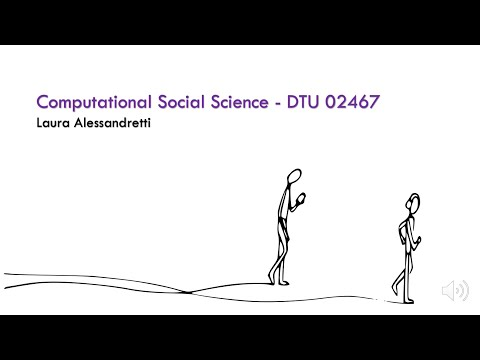

In [249]:

YouTubeVideo("UpwEsguMtY4",width=800, height=450)

> _Exercise 4: Authors overall activity_. We will start by studying the distribution of comments per author. 
> 1. Compute the total number of comments per author using the _comments dataset_. Then, make a histogram of the number of comments per author, using the function [``numpy.histogram``](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html), using logarithmic binning. Here are some important points on histograms (they should be already quite clear if you have watched the video above):
>     *  __Binning__: By default numpy makes 10 equally spaced bins, but you always have to customize the binning. The number and size of bins you choose for your histograms can completely change the visualization. If you use too few bins, the histogram doesn't portray well the data. If you have too many, you get a broken comb look. Unfortunately is no "best" number of bins, because different bin sizes can reveal different features of the data. Play a bit with the binning to find a suitable number of bins. Define a vector $\nu$ including the desired bins and then feed it as a parameter of numpy.histogram, by specifying _bins=$\nu$_ as an argument of the function. You always have at least two options:
>      * _Linear binning_: Use linear binning, when the data is not heavy tailed, by using ``np.linspace`` to define bins.
>      * _Logarithmic binning_: Use logarithmic binning, when the data is [heavy tailed](https://en.wikipedia.org/wiki/Fat-tailed_distribution), by using ``np.logspace`` to define your bins.
>     *  __Normalization__: To plot [probability densities](https://en.wikipedia.org/wiki/Probability_density_function), you can set the argument _density=True_ of the ``numpy.histogram`` function.
>
> 3. Compute the mean and the median value of the number of comments per author and plot them as vertical lines on top of your histogram. What do you observe? Which value do you think is more meaningful?


In [250]:
# compute number per author + boundaries
comments_per_author = comments.groupby(by='author').size()
min_val, max_val = (min(comments_per_author), max(comments_per_author))

min_val, max_val

(1, 398)

In [251]:
# compute bins
log_bins = np.logspace(np.log10(min_val), np.log10(max_val), 30)
lin_bins = np.linspace(min_val, max_val, 30)

# create histogram values
hist_log, edges_log = np.histogram(comments_per_author.values, log_bins, density=True)
hist_lin, edges_lin = np.histogram(comments_per_author.values, lin_bins)

# determine x-values
log_x = (edges_log[1:] + edges_log[:-1]) / 2.
lin_x = (edges_lin[1:] + edges_lin[:-1]) / 2.

xx, yy = zip(*[(i,j) for (i,j) in zip(log_x, hist_log) if j > 0])

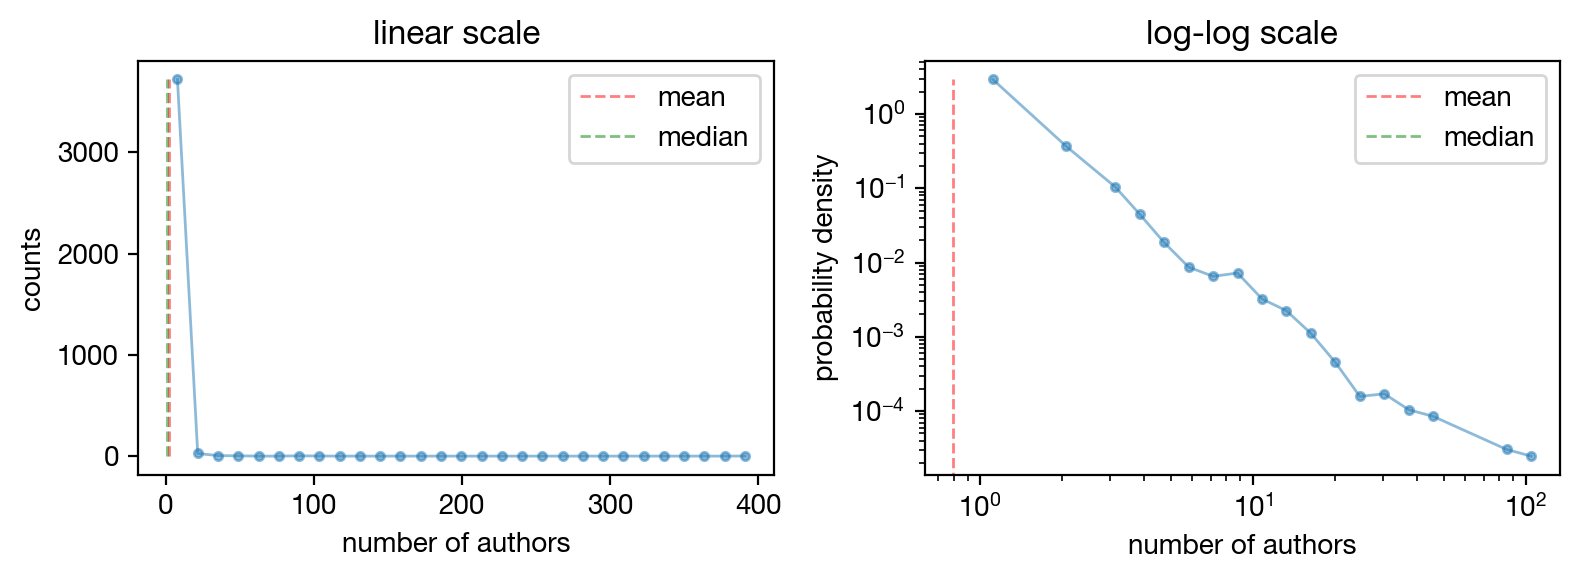

Mean number of comment per author: 2.222872340425532
Median number of comment per author: 1.0


In [252]:
# plot figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=((8,3)), dpi=200)

# linear scale plot
ax[0].plot(lin_x, hist_lin, marker='.', alpha=0.5)
ax[0].vlines(comments_per_author.mean(), ymin=0, ymax=max(hist_lin), colors='r', linestyle='--', alpha=0.5, label='mean')
ax[0].vlines(comments_per_author.median(), ymin=0, ymax=max(hist_lin), colors='g', linestyle='--', alpha=0.5, label='median')
ax[0].set_xlabel('number of authors')
ax[0].set_ylabel('counts')
ax[0].set_title('linear scale')
ax[0].legend()

# log-log scale plot
ax[1].plot(xx, yy, marker='.', alpha=0.5)
ax[1].vlines(np.log(comments_per_author.mean()), ymin=0, ymax=max(hist_log), colors='r', linestyle='--', alpha=0.5, label='mean')
ax[1].vlines(np.log(comments_per_author.median()), ymin=0, ymax=max(hist_log), colors='g', linestyle='--', alpha=0.5, label='median')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('number of authors')
ax[1].set_ylabel('probability density')
ax[1].set_title('log-log scale')
ax[1].legend()

# show figure
plt.tight_layout()
plt.show()

print(f'\
Mean number of comment per author: {comments_per_author.mean()}\n\
Median number of comment per author: {comments_per_author.median()}'
)

**Comments:**

Right now (temporary and simple data set) we don't observe much on the log-log as the median value is 1 - which is 0 in log space. We see that the data follows a power law since it is linear on a log-log scaled plot for which reason the median is more appropriate as it is not affected by high values which the mean is.

> _Exercise 5: Authors lifespan_. We will now move on to study authors lifespan, using a two-dimensional histogram.
>
> 1. For each author, find the time of publication of their first comment, _minTime_, and the time of publication of their last comment, _maxTime_, in [unix timestamp](https://www.unixtimestamp.com/). 
> 2. Compute the "lifespan" of authors as the difference between _maxTime_ and _minTime_. Note that timestamps are measured in seconds, but it is appropriate here to compute the lifespan in days. Make a histogram showing the distribution of lifespans, choosing appropriate binning. What do you observe?
> 3. Now, we will look at how many authors joined and abandoned the discussion on GME over time. First, use the numpy function [numpy.histogram2d](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html) to create a 2-dimensional histogram for the two variables _minTime_ and _maxTime_. A 2D histogram, is nothing but a histogram where bins have two dimensions, as we look simultaneously at two variables. You need to specify two arrays of bins, one for the values along the x-axis (_minTime_) and the other for the values along the y-axis (_maxTime_). Choose bins with length 1 week.
> 4. Now, use the matplotlib function [``plt.imshow``](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html) to visualize the 2d histogram. You can follow [this example](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) on StackOverflow. To show dates instead of unix timestamps in the x and y axes, use [``mdates.date2num``](https://matplotlib.org/api/dates_api.html#matplotlib.dates.date2num). More details in this [StackOverflow example](https://stackoverflow.com/questions/23139595/dates-in-the-xaxis-for-a-matplotlib-plot-with-imshow), see accepted answer.
> 5. Make sure that the colormap allows to well interpret the data, by passing ``norm=mpl.colors.LogNorm()`` as an argument to imshow. This will ensure that your colormap is log-scaled. Then, add a [colorbar](https://matplotlib.org/3.1.0/gallery/color/colorbar_basics.html) on the side of the figure, with the appropriate [colorbar label](https://matplotlib.org/3.1.1/api/colorbar_api.html#matplotlib.colorbar.ColorbarBase.set_label).
> 6. As usual :) Look at the figure, and write down three key observations.
> 7. Based on the data visualizations in Exercises 4 and 5, what can you conclude on the question: *Do all redditors played the same role in the GME saga?*


In [253]:
# convert to unix timestamp
comments.reset_index(inplace=True)
comments['created_time_unix'] = pd.Series([int(datetime_object.timestamp()) for datetime_object in comments.created_time])

In [254]:
# compute min and max time for individual authors
temp = comments.groupby(by='author').apply(lambda x: (min(x.created_time_unix), max(x.created_time_unix)))

# create a dataframe
df_lifespan = pd.DataFrame(temp).reset_index().drop(0, axis=1)
mintime, maxtime = np.array(list(zip(*temp)))
df_lifespan['_minTime_'], df_lifespan['_maxTime_'] = mintime, maxtime

df_lifespan.head()

author   _minTime_   _maxTime_
0             ---Tim---  1590678467  1590678467
1       --IdiotSavant--  1582230443  1582230443
2  -936eu87eo_18-12-oe_  1604764864  1604772574
3                -B-MO-  1579865942  1579865942
4              -Johnny-  1586797726  1586797726

In [255]:
# compute lifespan in days
lifespan = (df_lifespan._maxTime_ - df_lifespan._minTime_) / (3600*24)
min_val, max_val = min(lifespan), max(lifespan)

min_val, max_val

(0.0, 765.871875)

In [338]:
# compute bins
log_bins = np.logspace(0, np.log10(max_val), 30)
lin_bins = np.linspace(min_val, max_val, 30)

# create histogram values
hist_log, edges_log = np.histogram(lifespan.values, log_bins, density=True)
hist_lin, edges_lin = np.histogram(lifespan.values, lin_bins)

# determine x-values
log_x = (edges_log[1:] + edges_log[:-1]) / 2.
lin_x = (edges_lin[1:] + edges_lin[:-1]) / 2.

xx, yy = zip(*[(i,j) for (i,j) in zip(log_x, hist_log) if j > 0])

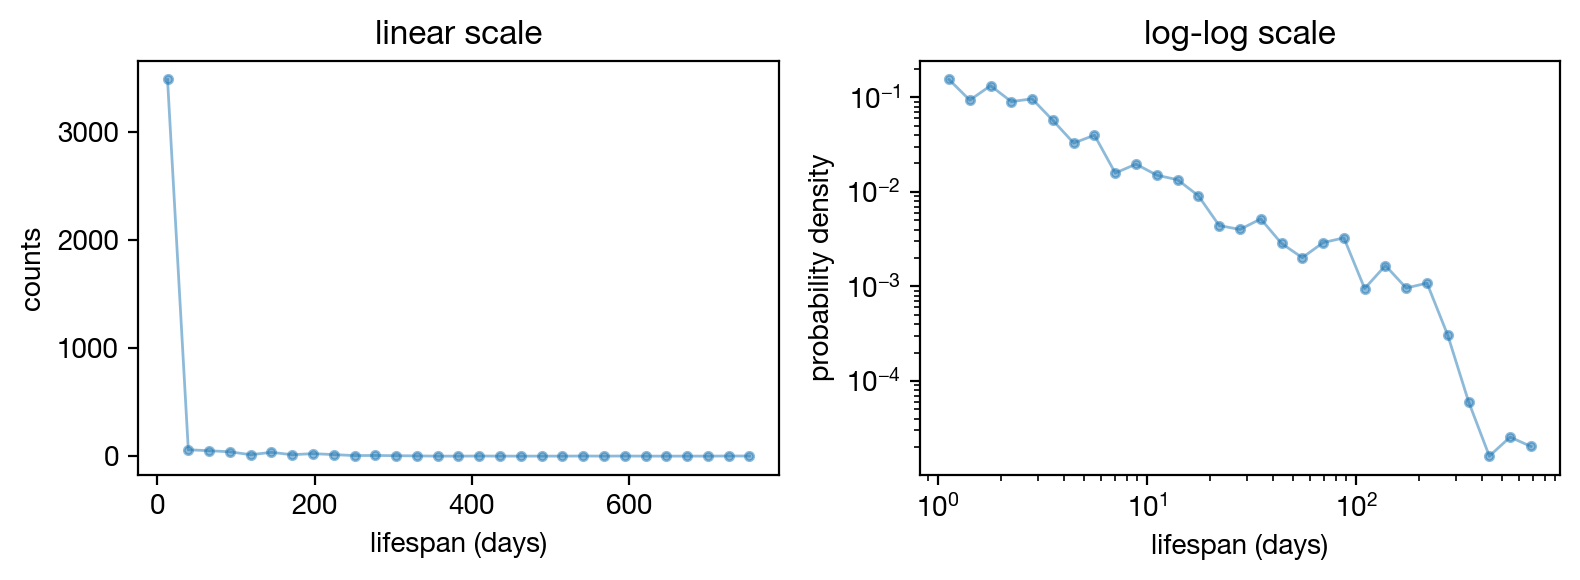

In [339]:
# plot figure
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=((8,3)), dpi=200)

# linear scale plot
ax[0].plot(lin_x, hist_lin, marker='.', alpha=0.5)
ax[0].set_xlabel('lifespan (days)')
ax[0].set_ylabel('counts')
ax[0].set_title('linear scale')

# log-log scale plot
ax[1].plot(xx, yy, marker='.', alpha=0.5)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].set_xlabel('lifespan (days)')
ax[1].set_ylabel('probability density')
ax[1].set_title('log-log scale')

# show figure
plt.tight_layout()
plt.show()

In [390]:
from matplotlib.dates import date2num as d2n
from matplotlib.dates import DateFormatter

# bins with 7 days in between
min_bins = np.arange(min(df_lifespan._minTime_), max(df_lifespan._minTime_), step=3600*24*7)
max_bins = np.arange(min(df_lifespan._maxTime_), max(df_lifespan._maxTime_), step=3600*24*7)

# create histogram
hist2d, edges_x, edges_y = np.histogram2d(df_lifespan['_minTime_'], df_lifespan['_maxTime_'], bins=[min_bins, max_bins])

# format bins as dates
edges_x = [datetime.datetime.fromtimestamp(ts) for ts in edges_x]
edges_y = [datetime.datetime.fromtimestamp(ts) for ts in edges_y]
extent = [edges_x[0], edges_x[-1], edges_y[0], edges_y[-1]]
extent = d2n(extent)

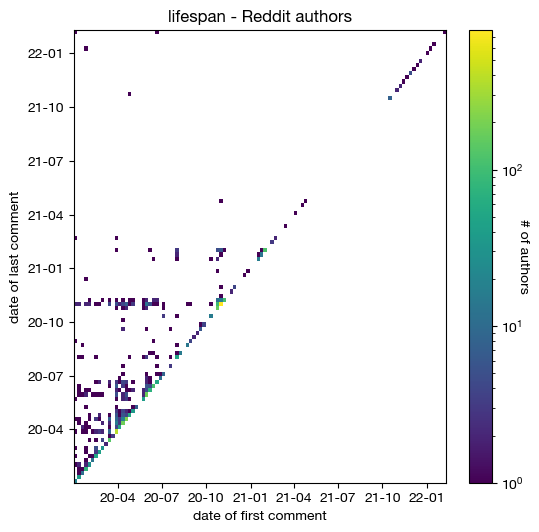

In [407]:
# plot figure
fig, ax = plt.subplots(figsize=((6,6)), dpi=100)
heatmap = ax.imshow(hist2d.T, extent=extent, origin='lower', cmap='viridis', norm=mpl.colors.LogNorm(), aspect='auto')

# add colorbar
cbar = fig.colorbar(heatmap, ax=ax)
cbar.ax.set_ylabel('# of authors', rotation=270)

# specify names, etc.
ax.set_title('lifespan - Reddit authors')
ax.set_xlabel('date of first comment')
ax.set_ylabel('date of last comment')

# Define the date format in plot
date_form = DateFormatter("%y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.yaxis.set_major_formatter(date_form)
ax.xaxis_date()
ax.yaxis_date()

plt.show()

**Comments:**

Key observations:
> 1. Most lifespans lie on the diagonal, meaning that most authors only comment once.
> 2. We see that authors comment in the first period of the era after have a longer lifespan than authors commenting later on. Maybe the authors commenting later on missed the hype and only comment once.
> 3. We see that the lower-right triangle is empty, which it is supposed to be, since the lifespan can not go back in time. In other words: the date of the first comment must occur before the date of the last comment.